In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, FeatureAgglomeration
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.random_projection import GaussianRandomProjection

from sklearn.model_selection import cross_val_score, learning_curve, train_test_split, StratifiedKFold, ShuffleSplit
from sklearn.neural_network import MLPClassifier

from scipy.stats import kurtosis

In [3]:
df1 = pd.read_csv('../data/data_1.csv')
df2 = pd.read_csv('../data/data2.csv')

In [166]:
def plot_elbow_kmeans(df):
    try:
        data = df.drop(['y'], axis = 1)
    except:
        data = df
    sse = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        data["clusters"] = kmeans.labels_
        #print(data["clusters"])
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()

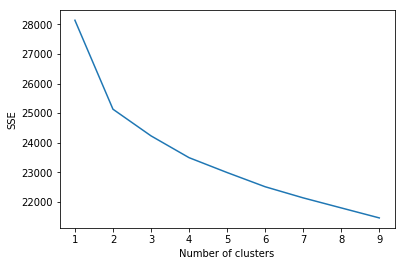

In [167]:
plot_elbow_kmeans(df1)

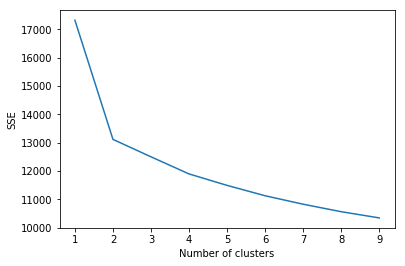

In [168]:
plot_elbow_kmeans(df2)

In [60]:
def plot_elbow_em(df):
    data = df.drop(['y'], axis = 1)
    log_likelihood = {}
    for k in range(1, 10):
        em = GaussianMixture(n_components=k).fit(data)
        log_likelihood[k] = em.score(data)
    plt.figure()
    plt.plot(list(log_likelihood.keys()), list(log_likelihood.values()))
    plt.xlabel("Number of clusters")
    plt.ylabel("Log Likelihood")
    plt.show()

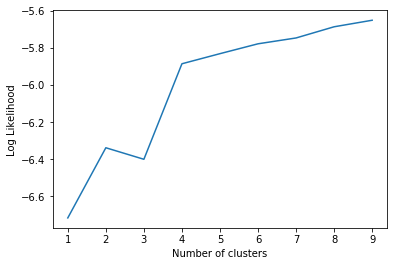

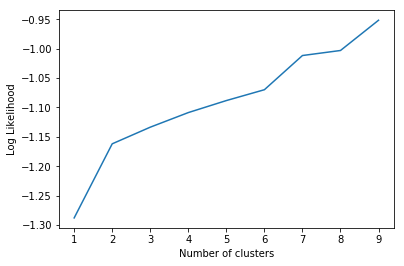

In [62]:
plot_elbow_em(df1)
plot_elbow_em(df2)

In [170]:
def k_means_cluster(df, n_clusters):
    try:
        X = df.drop(['y'], axis = 1).values
    except:
        X = df
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    centers = kmeans.cluster_centers_

    plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.9, c=y_kmeans, edgecolor='k')
    plt.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
            plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    plt.show()

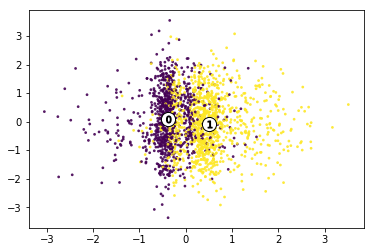

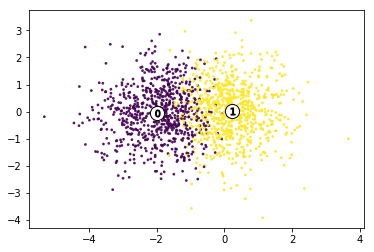

In [139]:
k_means_cluster(df1, 2)
k_means_cluster(df2, 2)

In [225]:
def plot_em_clusters(df, k):
    X = df.drop(['y'], axis=1).values

    em = GaussianMixture(n_components=k)
    labels = em.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.9, c=labels, edgecolor='k')
    plt.show()

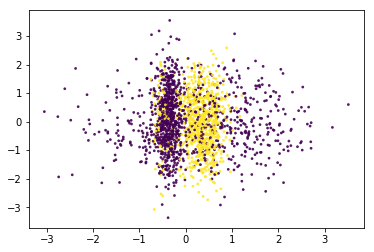

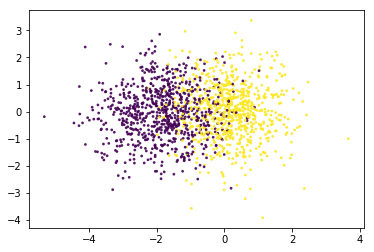

In [227]:
plot_em_clusters(df1, 2)
plot_em_clusters(df2, 2)

In [128]:
def plot_pca_variance(df):
    data = df.drop(['y'], axis = 1)
    pca = PCA().fit(data)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

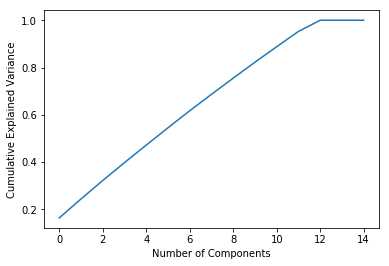

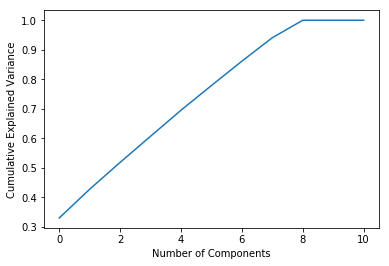

In [129]:
plot_pca_variance(df1)
plot_pca_variance(df2)

In [130]:
def plot_pca_eigenvalues(df):
    data = df.drop(['y'], axis = 1)
    pca = PCA().fit(data)
    n_components = [i for i in range(1, data.shape[1]+1)]
    eigenvalues = pca.explained_variance_

    plt.bar(n_components, eigenvalues, width=0.65, alpha=0.8)
    plt.xlabel('Principle Component')
    plt.ylabel('Eigenvalue')
    plt.show()

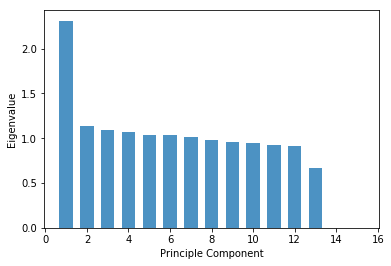

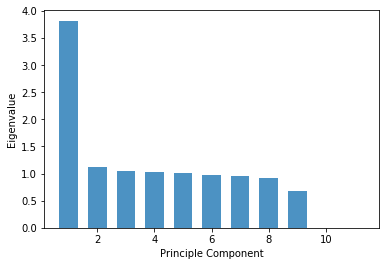

In [131]:
plot_pca_eigenvalues(df1)
plot_pca_eigenvalues(df2)

In [163]:
def plot_pca_elbow_kmeans(df, n_components):
    data = df.drop(['y'], axis = 1)
    pca = PCA(n_components=n_components).fit(data)
    X_pca = pca.transform(data)
    plot_elbow_kmeans(pd.DataFrame(X_pca))

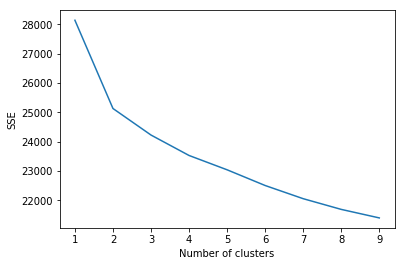

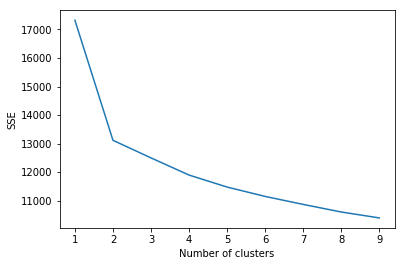

In [169]:
plot_pca_elbow_kmeans(df1, 13)
plot_pca_elbow_kmeans(df2, 9)

In [176]:
def plot_pca_kmeans_cluster(df, n_components, n_clusters):
    data = df.drop(['y'], axis = 1)
    pca = PCA(n_components=n_components).fit(data)
    X_pca = pca.transform(data)
    k_means_cluster(X_pca, n_clusters=n_clusters)

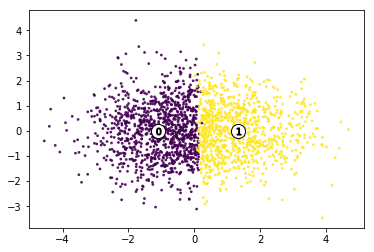

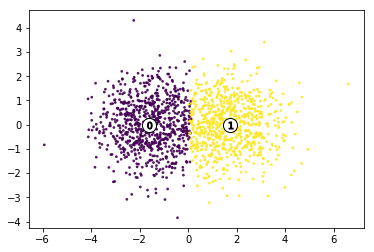

In [179]:
plot_pca_kmeans_cluster(df1, 13, 2)
plot_pca_kmeans_cluster(df2, 9, 2)

In [180]:
def labels_vs_clusters_kmeans(df, n_clusters):
    try:
        X = df.drop(['y'], axis = 1).values
    except:
        X = df
    labels = df['y'].values
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    clusters = kmeans.predict(X)
    df = pd.DataFrame({'Labels': labels, 'Clusters': clusters})

    ct = pd.crosstab(df['Labels'], df['Clusters'])
    print(ct)

In [229]:
labels_vs_clusters_kmeans(df1, 2)

Clusters    0    1
Labels            
0         122  544
1         490  176
2         295  373


In [184]:
labels_vs_clusters_kmeans(df2, 2)

Clusters    0    1
Labels            
0         684   66
1          94  656


In [218]:
def ica(df):
    X = df.drop(['y'], axis = 1).values
    y = df['y'].values

    ica = FastICA(max_iter=2000, tol=0.001)
    X_r = ica.fit(X).transform(X)

    kurt = kurtosis(X_r)

    plt.figure()
    plt.bar(np.arange(kurt.shape[0]), kurt)
    plt.xlabel('Component')
    plt.ylabel('Kurtosis')
    plt.title('ICA Component Kurtosis')
    plt.show()

/anaconda3/envs/cs4641/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


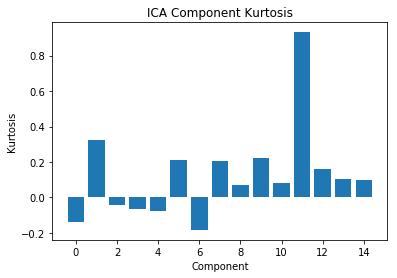

In [219]:
ica(df1)

In [228]:
def rp(df):
    X = df.drop(['y'], axis = 1).values
    y = df['y'].values

    rp = GaussianRandomProjection()
    X_r = rp.fit(X).transform(X)

In [221]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [298]:
class KMeansClusterer:
    def __init__(self, df, n_clusters):
        self.df = df
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=self.n_clusters)
    
    def plot(self, X):
        self.kmeans.fit(X)
        y_kmeans = self.kmeans.predict(X)
        centers = self.kmeans.cluster_centers_

        plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.9, c=y_kmeans, edgecolor='k')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        for i, c in enumerate(centers):
                plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        plt.show()
        
    def labels_vs_clusters(self, X):
        labels = self.df['y'].values
        clusters = self.kmeans.predict(X)
        df = pd.DataFrame({'Labels': labels, 'Clusters': clusters})

        ct = pd.crosstab(df['Labels'], df['Clusters'])
        print(ct)
        return clusters, labels
        
    def evaluate(self, red=None):
        X = self.df.drop(['y'], axis = 1).values
        if red:
            y = self.df['y'].values
            X = red.fit_transform(X, y)
            
        self.plot(X)
        c, l = self.labels_vs_clusters(X)
        return c, l

In [258]:
kmeans1 = KMeansClusterer(df1, 3)
kmeans2 = KMeansClusterer(df2, 2)

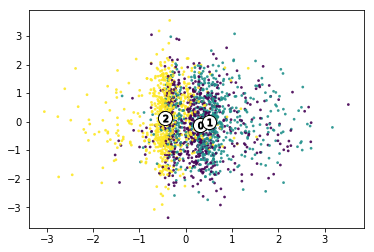

Clusters    0    1    2
Labels                 
0         267  324   75
1         126  117  423
2         223  216  229


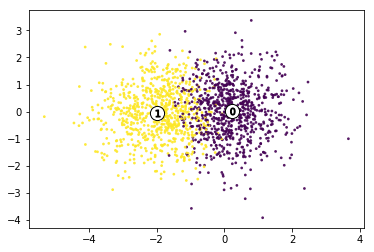

Clusters    0    1
Labels            
0         684   66
1          94  656


In [249]:
kmeans1.evaluate()
kmeans2.evaluate()

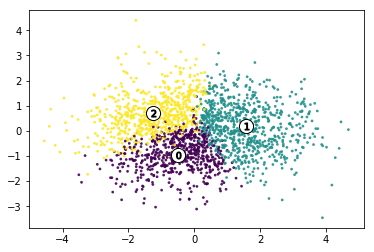

Clusters    0    1    2
Labels                 
0         265   74  327
1         130  422  114
2         222  228  218


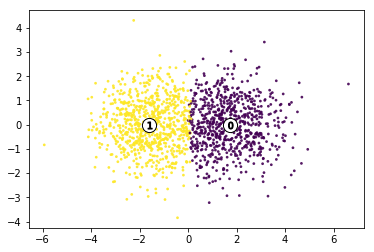

Clusters    0    1
Labels            
0          66  684
1         656   94


In [325]:
kmeans1.evaluate(PCA(n_components=13))
kmeans2.evaluate(PCA(n_components=9))

/anaconda3/envs/cs4641/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


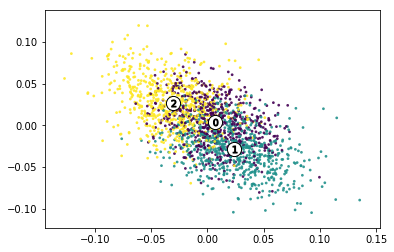

Clusters    0    1    2
Labels                 
0         152  300  214
1         281  119  266
2         168  301  199


/anaconda3/envs/cs4641/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


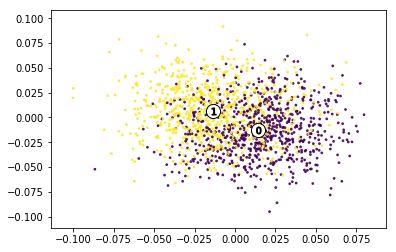

Clusters    0    1
Labels            
0         580  170
1         172  578


In [250]:
kmeans1.evaluate(FastICA(max_iter=2500))
kmeans2.evaluate(FastICA(max_iter=2500))

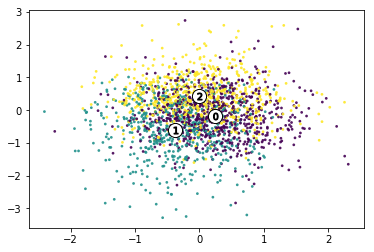

Clusters    0    1    2
Labels                 
0         374  189  103
1         188  107  371
2         187  289  192


In [342]:
kmeans1.evaluate(GaussianRandomProjection(n_components=13))

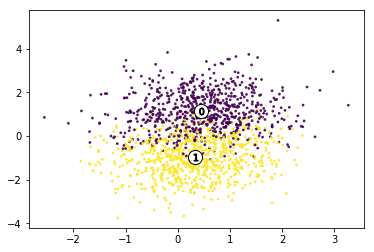

Clusters    0    1
Labels            
0          67  683
1         659   91


In [343]:
kmeans2.evaluate(GaussianRandomProjection(n_components=9))

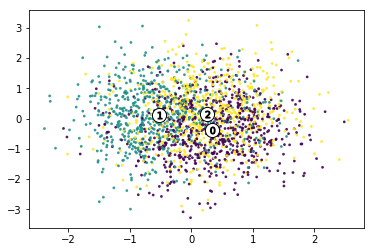

Clusters    0    1    2
Labels                 
0         268   91  307
1         173  330  163
2         237  213  218


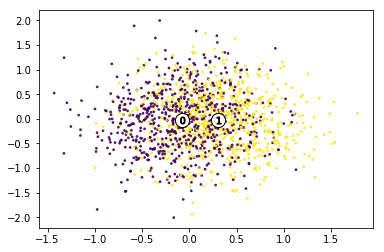

Clusters    0    1
Labels            
0          75  675
1         647  103


In [357]:
kmeans1.evaluate(FeatureAgglomeration(n_clusters=13))
kmeans2.evaluate(FeatureAgglomeration(n_clusters=5))

In [297]:
class ExpMax:
    def __init__(self, df, k):
        self.df = df
        self.k = k
        self.em = GaussianMixture(n_components=k)
    
    def plot(self, X):
        self.em.fit(X)
        clusters = self.em.predict(X)

        plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.9, c=clusters, edgecolor='k')
        plt.show()

    def labels_vs_clusters(self, X):
        labels = self.df['y'].values
        clusters = self.em.predict(X)
        df = pd.DataFrame({'Labels': labels, 'Clusters': clusters})

        ct = pd.crosstab(df['Labels'], df['Clusters'])
        print(ct)
        return clusters, labels
        
    def evaluate(self, red=None):
        X = self.df.drop(['y'], axis = 1).values
        if red:
            y = self.df['y'].values
            X = red.fit_transform(X, y)

        self.plot(X)
        clusters, labels = self.labels_vs_clusters(X)
        return clusters, labels

In [268]:
em1 = ExpMax(df1, 3)
em2 = ExpMax(df2, 2)

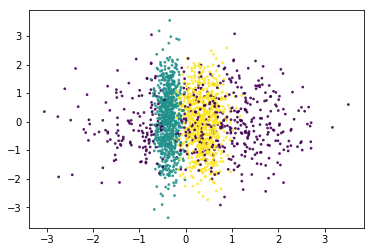

Clusters    0    1    2
Labels                 
0           7    5  654
1           9  655    2
2         526   88   54


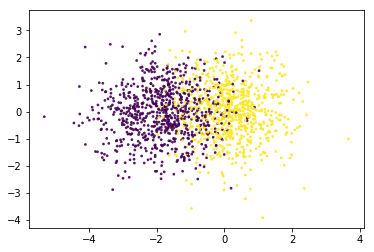

Clusters    0    1
Labels            
0          70  680
1         692   58


In [269]:
em1.evaluate()
em2.evaluate()

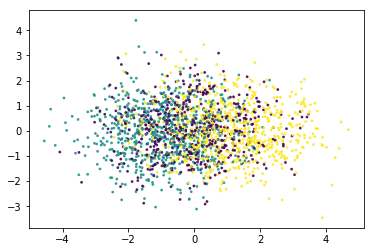

Clusters    0    1    2
Labels                 
0           7  654    5
1          10    3  653
2         527   54   87


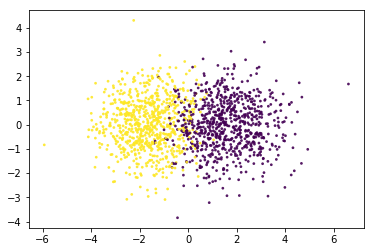

Clusters    0    1
Labels            
0          72  678
1         692   58


In [271]:
em1.evaluate(PCA(n_components=13))
em2.evaluate(PCA(n_components=9))

/anaconda3/envs/cs4641/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


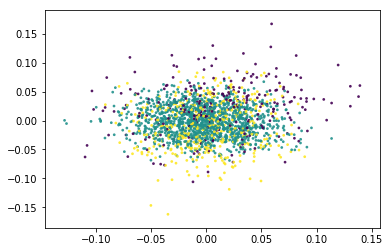

Clusters    0    1    2
Labels                 
0          56  513   97
1          39  466  161
2         167  320  181


/anaconda3/envs/cs4641/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


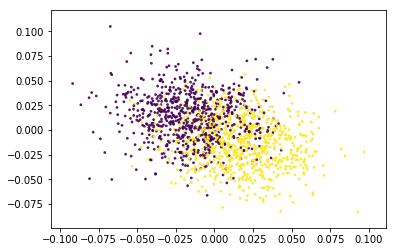

Clusters    0    1
Labels            
0          46  704
1         672   78


In [274]:
em1.evaluate(FastICA(max_iter=2500))
em2.evaluate(FastICA(max_iter=2500))

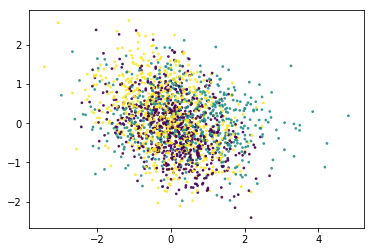

Clusters    0    1    2
Labels                 
0         654    7    5
1           2    9  655
2          54  527   87


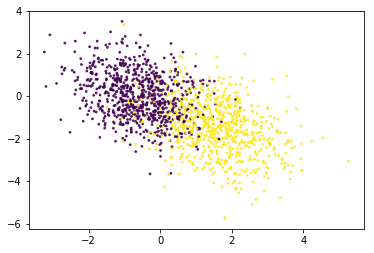

Clusters    0    1
Labels            
0         685   65
1          62  688


In [273]:
em1.evaluate(GaussianRandomProjection(n_components=13))
em2.evaluate(GaussianRandomProjection(n_components=9))

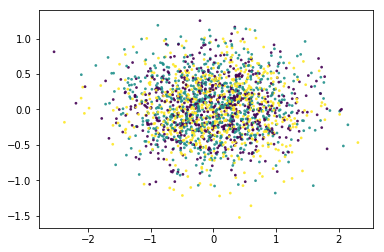

Clusters    0    1    2
Labels                 
0         218  278  170
1         183  219  264
2         198  243  227


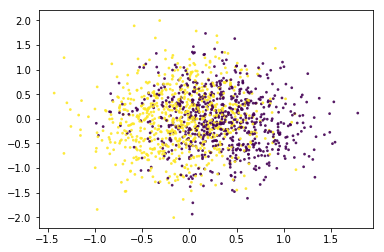

Clusters    0    1
Labels            
0         679   71
1          56  694


In [356]:
em1.evaluate(FeatureAgglomeration(n_clusters=7))
em2.evaluate(FeatureAgglomeration(n_clusters=5))

In [300]:
class NeuralNet:
    def __init__(self, df):
        self.df = df
        self.mlp = MLPClassifier(max_iter=1500, solver='adam', alpha=0.0001, hidden_layer_sizes=(30,))
        
    def plot_learning_curve(self, title='Learning Curve (NN)', ylim=None, X=None, y=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        cv = StratifiedKFold(n_splits=10)
        X = self.df.drop(['y'], axis = 1).values if not X.any() else X
        y = self.df['y'].values if not y else y
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(
            self.mlp, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()
    
    def evaluate(self, title, red=None, X=None, y=None):
        X = self.df.drop(['y'], axis = 1).values if not X.any() else X
        y = self.df['y'].values if not y.any() else y
        if red:
            X = red.fit_transform(X, y)
        self.plot_learning_curve(X=X, n_jobs=4, title=title)

In [294]:
nn1 = NeuralNet(df1)
nn2 = NeuralNet(df2)

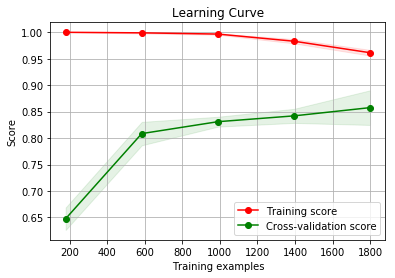

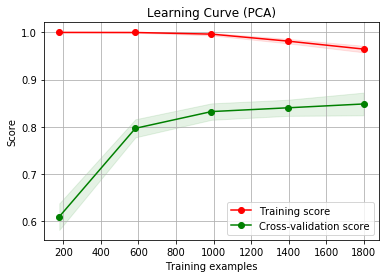

/anaconda3/envs/cs4641/lib/python3.7/site-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


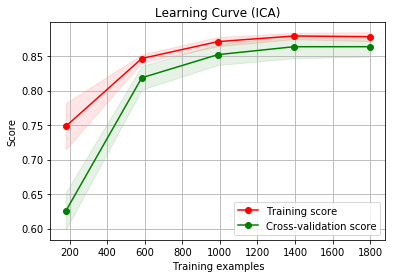

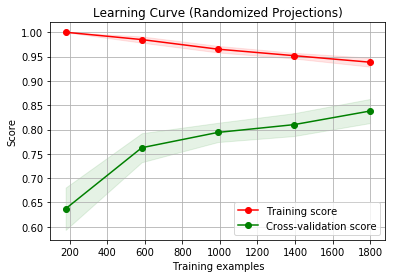

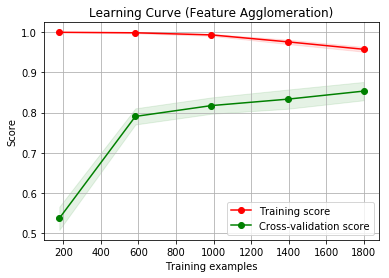

In [296]:
nn1.evaluate(title='Learning Curve')
nn1.evaluate(title='Learning Curve (PCA)', red=PCA(n_components=13))
nn1.evaluate(title='Learning Curve (ICA)', red=FastICA(max_iter=2500))
nn1.evaluate(title='Learning Curve (Randomized Projections)', red=GaussianRandomProjection(n_components=13))
nn1.evaluate(title='Learning Curve (Feature Agglomeration)', red=FeatureAgglomeration(n_clusters=13))

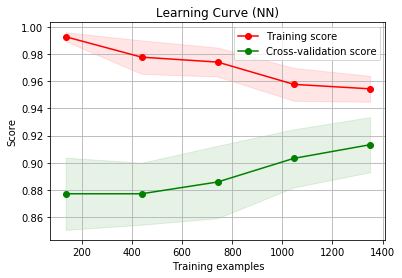

In [290]:
nn2.evaluate()

In [308]:
km1 = KMeansClusterer(df1, 3)
em1 = ExpMax(df1, 3)

In [358]:
class ClusterClassifier:
    def __init__(self, df, c, nn):
        self.df = df
        self.c = c
        self.nn = nn

    def evaluate(self, title, red=None):
        clusters, labels = self.c.evaluate(red)
        self.nn.evaluate(title=title, red=red, X=clusters.reshape(-1, 1), y=labels)
        
    def evaluate_c(self, title):
        clusters, labels = self.c.evaluate()
        X = self.df.drop(['y'], axis = 1)
        X['c'] = clusters
        X = X.values
        print(X.shape)
        self.nn.evaluate(title=title, X=clusters.reshape(-1, 1), y=labels)

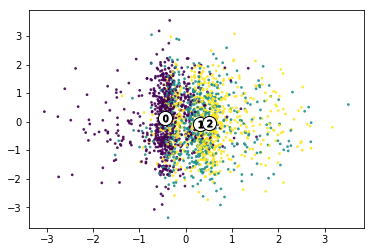

Clusters    0    1    2
Labels                 
0          73  271  322
1         423  126  117
2         230  218  220


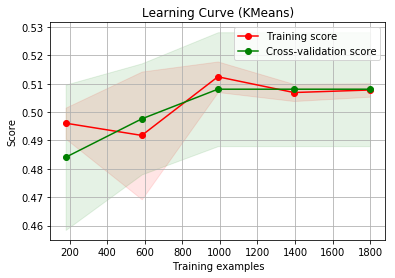

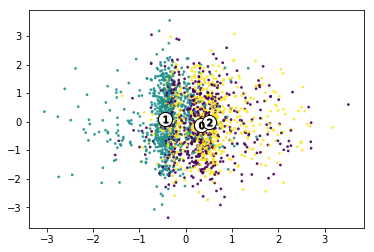

Clusters    0    1    2
Labels                 
0         282   76  308
1         123  431  112
2         210  230  228
(2000, 16)


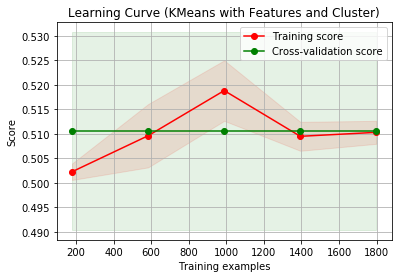

In [359]:
km_cc = ClusterClassifier(df1, km1, NeuralNet(df1))
km_cc.evaluate(title='Learning Curve (KMeans)')
km_cc.evaluate_c(title='Learning Curve (KMeans with Features and Cluster)')

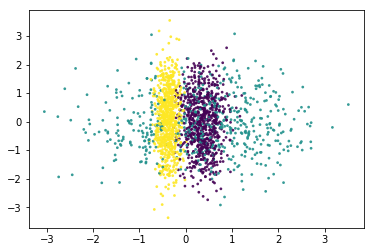

Clusters    0    1    2
Labels                 
0         654    7    5
1           2    9  655
2          54  527   87


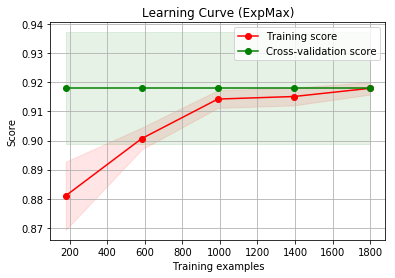

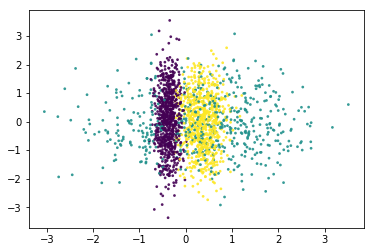

Clusters    0    1    2
Labels                 
0           5    7  654
1         655    9    2
2          87  527   54


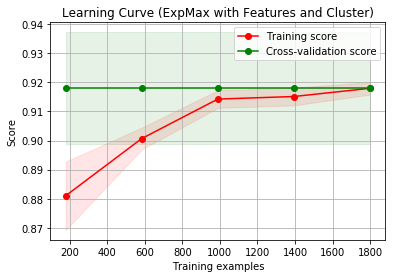

In [324]:
em_cc = ClusterClassifier(df1, em1, NeuralNet(df1))
em_cc.evaluate(title='Learning Curve (ExpMax)')
em_cc.evaluate_c(title='Learning Curve (ExpMax with Features and Cluster)')